# Introducción a la Inteligencia Artificial


<img src="images/Cartoon_Robot.svg.png" width="200"/>

---
Fernando Izco García  (fernando.izco.garcia@navarra.es)  
 Servicio de Avance Digital  
 Dirección General de Telecomunicaciones y Digitalización  
<img src="images/logo.gn.png" width="300"/>

# Introducción a la Inteligencia Artificial

1. Primera parte
    1. **Un ejemplo como introducción**
    1. [Definición y casos de uso](Intro-IA-2.ipynb)
1. Segunda parte
    1. [Claves del aprendizaje supervisado](Intro-IA-3.ipynb)
    1. [Claves del aprendizaje profundo](Intro-IA-4.ipynb)
    1. [Ética e IA](Intro-IA-5.ipynb)


[<img src="images/youtube.png" width="30"  align="left"/>](https://youtu.be/SYFrgoForwo)

[Video de este capítulo en YouTube](https://youtu.be/SYFrgoForwo)


## Objetivo de esta formación

Obtener un **conocimiento técnico general** que os ayude a
1. **Identificar problemas** susceptibles de ser resueltos con técnicas de IA
1. Definir, contratar y gestionar con éxito **proyectos** relacionados con la IA

### Requisitos
* Conocimientos TIC en general
* Matemáticas de secundaria
* Algo de programación, pero no es imprescindible

<img src="images/disclaimer.jpg" width="1200"/>


<img src="images/cc.png" width="200"/>

## Descargo de responsabilidad

Puede que alguno de los contenidos de la presentación estén sujetos a derechos de autor. Si crees que es así:
    * Ten en cuenta que esto es una iniciativa sin ánimo de lucro, impulsada por una administración pública
    * Antes de denunciarme, avisame.

## Una nota acerca del entorno de esta presentación

<img src="images/tools.png" width="1200"/>


## Una nota acerca del entorno de esta presentación

The Jupyter Notebook is an open-source **web application** that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

https://jupyter.org/

Python es un lenguaje de programación interpretado cuya filosofía hace hincapié en la legibilidad de su código.​ Se trata de un lenguaje de programación multiparadigma, ya que soporta orientación a objetos, programación imperativa y, en menor medida, programación funcional.

https://www.python.org/

OBS Studio es un programa para la grabación y difusión de video

https://obsproject.com/es/download

Audacity para editar audio

https://www.audacityteam.org/


## Todos son multiplataforma y se distribuyen con licencia libre


# Introducción a la Inteligencia Artificial

1. Primera parte
    1. **Un ejemplo como introducción**
    1. Definición, casos de uso y tipología
1. Segunda parte
    1. Claves del aprendizaje supervisado
    1. Claves del aprendizaje profundo
    1. Ética e IA

# Un ejemplo, como introducción: 
## La ecuación del vino que toca las narices
### Peter Passell , The New York Times,  4 de marzo de 1990
"Calcule la lluvia durante el invierno y durante la cosecha (en milímetros). Agregue la temperatura en verano en el viñedo (en grados centígrados). Reste 12,145. ¿Que tiene? Una discusión muy, muy apasionada sobre el vino. El profesor Orley Ashenfelter, economista de Princeton, ha ideado una fórmula matemática para predecir la calidad de las cosechas de vino tinto en Francia. Y los guardianes de la tradición están furiosos."

The New York Times
*'Wine Equation Puts Some Noses Out of Joint'*
By Peter Passell
March 4, 1990

https://www.nytimes.com/1990/03/04/us/wine-equation-puts-some-noses-out-of-joint.html


In [ ]:
# Para ver el video original en YouTube:
#from IPython.display import YouTubeVideo
#YouTubeVideo('Ec8hPHLMyzY')

from IPython.display import Video
Video("videos/AshenfelterGoodMorningAmerica_es.m4v")


## Tésis del Prof. Ashenfelter

# Tomar DECISIONES basadas en DATOS  en lugar de en sensaciones


* Los buenos vinos mejoran con la edad. También aumentan de precio.
* Es buena idea comprar un vino cuando es joven, suponiendo que va a envejecer bien.

Por entonces la FUTURA calidad (y el precio) de los vinos se basaban en las **sensaciones** de los expertos, que probaban el vino joven para estimar la calidad futura.

La tesis del prof. Ashenfelter era:
* Que la **meteorología** era el principal factor de la **diferencia de calidad** de un vino de una bodega concreta en **diferentes años**
* Que el **precio** se podía **predecir** basándose en datos: la **meteorología** y el **precio** alcanzado por los vinos de añadas anteriores

## Tomar decisiones (que vinos jóvenes comprar) basadas en datos (meteorología y precios alcanzados anteriormente) en lugar de en sensaciones (propiedades organolépticas del vino joven)

In [ ]:
import pandas as pd

data = pd.read_csv('data/meteo.vinos.csv')
print(data)

## Conjunto de datos de entrenamiento
El conjunto de datos incluye:
* Los datos meteorológicos de 27 cosechas
* El precio que alcanzaron esos vinos una vez maduros

Pandas es la librería por excelencia en Python para tratar datos tabularesy 
Numpy, lo mismo, para matemáticas

In [ ]:
# Matplotlib para gráficos:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

# Columnas de la tabla a vectores
x = data['TemperaturaMediaVerano'].values
y = data['Precio'].values

# Diagrama de puntos (scatter plot)
plt.scatter(x, y)
plt.title("Precio en función de la temperatura media en verano")
plt.xlabel("Temperatura media verano")
plt.ylabel("Precio")

## matplotlib

**Matplotlib** es una biblioteca para la **generación de gráficos** 
* a partir de datos contenidos en listas o arrays 
* en el lenguaje de programación Python

In [ ]:
x = data['LluviaCosecha'].values
y = data['Precio'].values

plt.scatter(x , y)
plt.title("Precio en función de la lluvia durante la cosecha en otoño")
plt.xlabel("LLuvia en otoño")
plt.ylabel("Precio")

In [ ]:
x = data['LluviaInvierno'].values
y = data['Precio'].values

plt.scatter(x, y)
plt.title("Precio en función de la lluvia en invierno")
plt.xlabel("LLuvia en invierno")
plt.ylabel("Precio")

In [ ]:
x = data['Edad'].values
y = data['Precio'].values

plt.scatter(x, y)
plt.title("Precio en función de la edad del vino")
plt.xlabel("Edad del vino")
plt.ylabel("Precio")

## El método del Profesor Ashenfelter

### Regresión lineal (aprendizaje máquina supervisado)

* Partimos de un conjunto de **datos de entrenamiento**
* Y un **Modelo** matemático (modelo lineal)
* **Entrenamiento del modelo**, gracias al conjunto de datos de entrenamiento
    * Descenso de gradiente

## El método del Profesor Ashenfelter

El método se llama **regresión lineal** y entra dentro de lo que llamamos **aprendizaje máquina supervisado**:

* Partimos de un conjunto de **datos de entrenamiento**:
    * Datos meteorológicos recopilados por los bodegueros franceses
    * Los precios alcanzados por los vinos en las subastas más importantes
* **Modelo** matemático:  
    * Un sencillo modelo lineal
* **Entrenamiento del modelo**, gracias al conjunto de datos de entrenamiento
    * Mediante un algoritmo de optimización denominado **descenso de gradiente**

## ¿Qué es un modelo matemático?

En aprendizaje máquina un modelo:
* Es una **función parametrizada** por un conjunto de parámetros **(A)**
* Que se puede **programar**
* Que *predice* la variable que queremos calcular **(y)** a partir de unos datos de entrada **(x)**

$\hat y = f_A(x)$

## Ejemplo de función para metrizada: la ecuación de una recta

<img src="images/recta.png" style="width: 1200px;"/>

Todos conocéis la ecuación de una recta.  
* Es una función parametrizada. Tenemos los datos de entrada (X), la salida (Y)
* Y dos parámetros: m y b

## Ejemplo de función para metrizada: la ecuación de una recta

In [ ]:
import numpy as np

# Definición de la ecuación de una recta:
def y_recta(x):
    return  m * x + b

# Damos valores a los parámetros:
m = b = 5

# Dibujamos unos cuantos puntos
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = y_recta(x)
plt.axis('equal')
plt.scatter(x, y)

## Modelo lineal, en general

$\hat y = f_A(X)$

$\hat y = \alpha_0 + \alpha_1 \cdot  x_1 + \alpha_2 \cdot x_2 + \cdot\cdot\cdot + \alpha_n \cdot  x_n$

## Modelo lineal del profesor Ashenfelter

$prediccion\_precio = \alpha_0 + \alpha_1 \cdot  temp\_ver + \alpha_2 \cdot lluvia\_inv + \alpha_3 \cdot  lluvia\_oto +  \alpha_4 \cdot  edad$


In [ ]:
def predice_precio_vino(lluvia_invierno, temperatura_verano, lluvia_cosecha, edad):
    return a0 + a1 * lluvia_invierno + a2 * temperatura_verano + a3 * lluvia_cosecha + a4 * edad

In [ ]:
a0 = a1 = a2 = a3 = a4 = 0.03

In [ ]:
print(data[:1])

In [ ]:
predice_precio_vino(lluvia_invierno =600, temperatura_verano = 17.11, lluvia_cosecha = 160, edad = 31)

El problema es **calcular los parámetros** para que la predicción sea lo más precisa posible

## ¿Cómo calcular los parámetros? 

**Entrenando el modelo** mediante el algoritmo de **descenso de gradiente**

## Para entenderlo, vamos a simplificar a una sola variable (y dos parámetros)

$prediccion\_precio\_vino = \alpha_0 + \alpha_1 \cdot  temperatura\_verano$

(Simplificamos para poder representarlo gráficamente)

## Regresión lineal con descenso de gradiente en Python
Simplificado a una sóla variable de entrada

In [ ]:
class SimpleModel:
    
    def __init__(this, a0 = 0, a1 = 0):
        # Parámetros del modelo:
        this.a0 = a0
        this.a1 = a1
        
    # Predicción según un modelo lineal (simplifiada a una sola variable):    
    def predict(this, x):
        return this.a0 + this.a1 * x
    
    # Función de pérdida
    def loss(this, y_hat, y): 
        return 0.5 * np.square((y_hat-y)).mean()
    
    # Un ciclo de entrenamiento por descenso de gradiente
    def fit(this, x, y, lr):
        y_hat = this.predict(x)
        grad_a0 = (y_hat - y).mean()
        grad_a1 = (x * (y_hat - y)).mean()  
        this.a0 = this.a0 - lr * grad_a0
        this.a1 = this.a1 - lr * grad_a1

Esta es la definición del modelo 
* simplificado, una única variable, dos parámetros
* que **encapsula** los parámetros y las funciones en una **clase**

#### Predicción con el modelo **sin entrenar**

In [93]:
m = SimpleModel()
m.predict(x = 19)

0

In [94]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "images/la.cuadrilla.jpg", width=800)

#### Entrenamiento iterativo

In [157]:
m = SimpleModel()
x = data['TemperaturaMediaVerano'].values
y = data['Precio'].values

Pérdida: 2.495018223927645


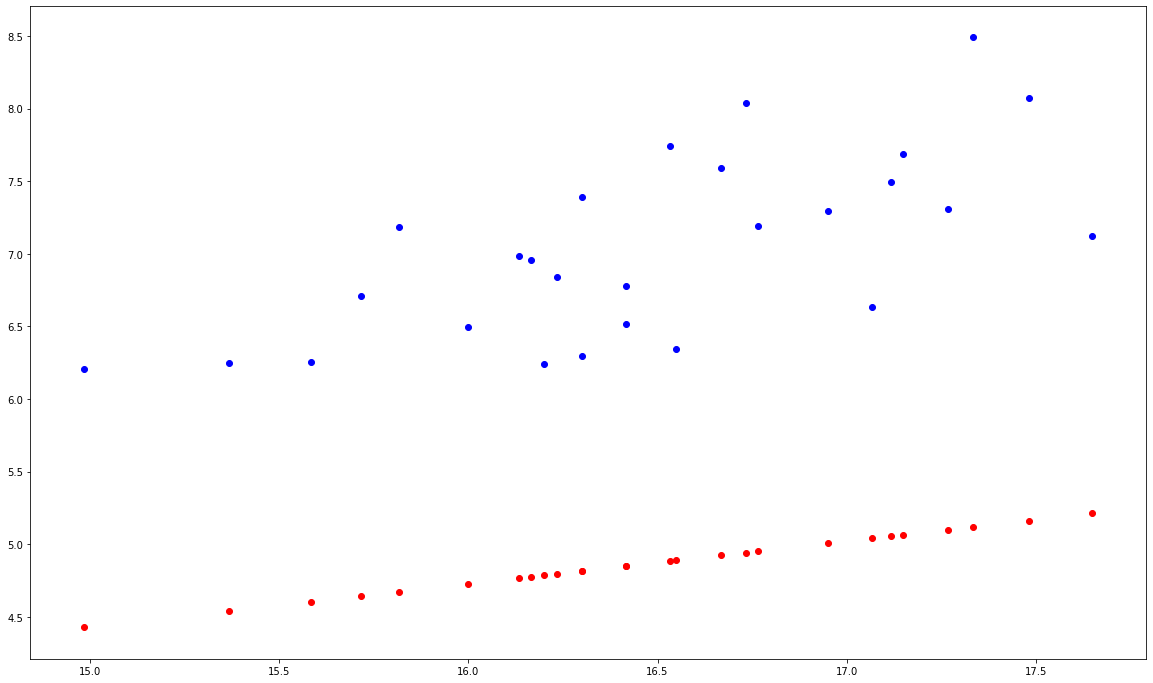

In [166]:
# Cada vez que ejecutemos esta celda, es un ciclo de entrenamiento (una época)
# Predicción y error medio:
y_hat = m.predict(x)
loss = m.loss(y_hat, y)
# Los dibujamos:
print("Pérdida:", loss)
plt.scatter(x, y, color='blue');
plt.scatter(x, y_hat, color='red');
plt.show()
# Un ciclo de entrenamiento:
m.fit(x, y, lr = 0.0005) # probar con lr = 0.003 y lr = 005 y lr = 0.008

## Descenso de gradiente

Imagina que te sorprende la niebla en lo alto de una montaña.

<img src="images/fog.mountain.jpg" width="1000"/>



## Descenso de gradiente

El descenso de gradiente es un algoritmo de **optimización** de propósito general. Nos sirve para encontrar los **parámetros** de una función que la **minimizan**.

**Gradiente** es sinónimo de **pendiente**, por lo que también podemos llamar al método **Descenso de pendiente**, lo que recuerda al simil de descender de una montaña al fondo del valle.

Imagina que te sorprende la niebla en lo alto de una montaña.


Descenso de una montaña:
1. Tantear, buscando en qué dirección desciende
2. Un pequeño paso
3. Repetir

<img src="images/gradient-descent.jpeg" width="800"/>

Descenso de gradiente:
1. Derivada de la función de pérdida con respecto a los parámetros
2. Ajuste de parámetros
3. Repetir

Estrategia:
1. Tanteas con el pie a tu alrededor para ver en qué dirección hay más **pendiente** hacia abajo
2. Das **un pequeño paso** en esa dirección
3. **Repetir** hasta llegar a la base de la montaña

Eso mismo es lo que hace el algoritmo de descenso de gradiente.
1. Calcular la **derivada** (pendiente) de cada parámetro con respecto a la función de coste
2. **Modificar ligeramente cada parámetro** según la derivada
3. **Repetir** hasta la convergencia

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

## ¿Derivada?

<img src="images/newton-leibniz.png" width="1200"/>


## ¿Derivada?
Para modificar de manera iterativa los parámetros aprovechamos el concepto del calculo matemático denominado **derivada**

Que no os confunda su aspecto, esos pelucones cubrían dos cocos privilegiados


## Si consultáis el libro de mates ...

La función de pérdida que vamos a usar es la función de pérdida *'L2'* que se representa así:

$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( \hat y_i - y_i )^2$ 

Y la hemos programado así:

``` 
def loss(this, y_hat, y): 
    return 0.5 * np.square(y_hat-y).mean() 
```

Las derivadas parciales (gradientes) con respecto a los parámetros son

$ \frac{d}{d\theta_0} = \frac{1}{m} \sum_{i=1}^m ( \hat y_i - y_i )$ 

$ \frac{d}{d\theta_1} = \frac{1}{m} \sum_{i=1}^m (x_i \cdot (\hat y_i - y_i ))$  

Y lo hemos programado así:

```
grad_a0 = (y_hat - y).mean()
grad_a1 = (x * (y_hat - y)).mean()
```

## Ahora mira el código otra vez ##

## Ajuste de parámetros (Entrenamiento)


In [171]:
m = SimpleModel()
parametros = []
perdidas = []

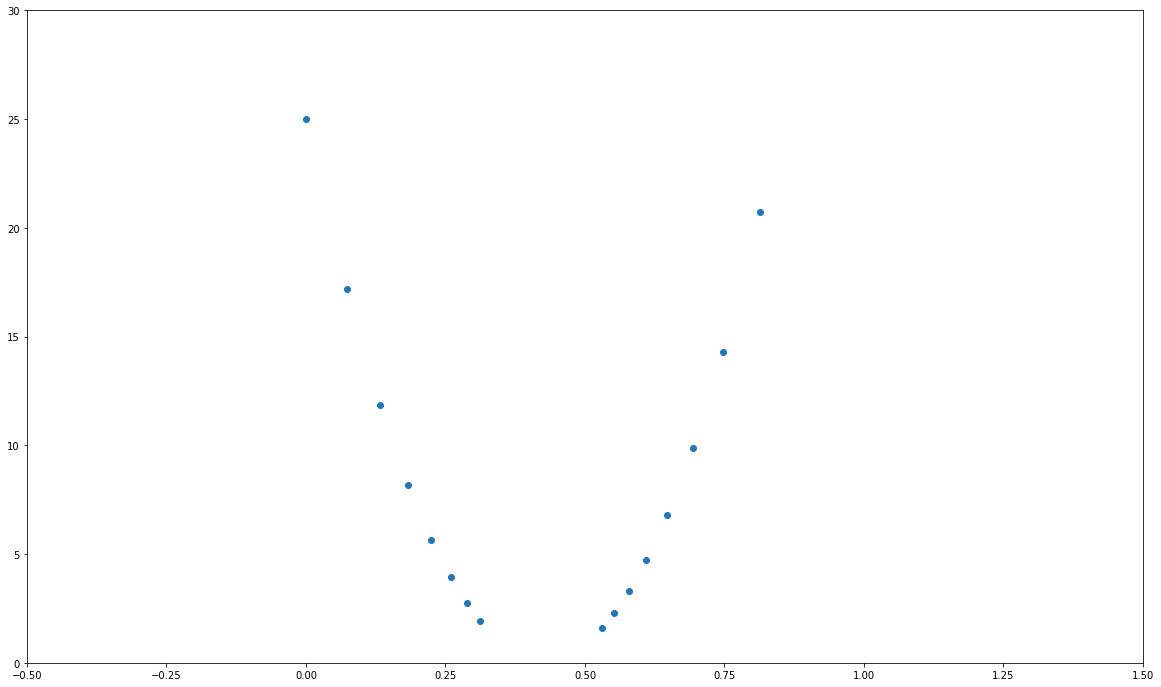

In [187]:
# Predicción y error:
y_hat = m.predict(x)
loss = m.loss(y_hat, y)
# Guardamos los valores del parámetro y de la pérdida en dos listas, para dibujar todos los puntos
parametros.append(m.a1)
perdidas.append(loss)
# Dibujamos un parámetro y el error medio:
plt.axis([-.5, 1.5, 0, 30])
plt.scatter(parametros, perdidas);
plt.show()
# Un ciclo de entrenamiento:
m.fit(x, y, lr = 0.007) # probar con lr = 0.003 y lr = 0.007 y lr = 0.008

## Ajuste de parámetros (Entrenamiento)

Vamos a representar gráficamente el valor de uno de los parámetros en función de la función de pérdida durante el proceso de entrenamiento

## El ratio de aprendizaje (*learning rate*)


```
# Un ciclo de entrenamiento (una época)
def fit(this, x, y, lr):
    y_hat = this.predict(x)
    grad_a0 = (y_hat - y).mean()
    grad_a1 = (x * (y_hat - y)).mean()  
    this.a0 = this.a0 - lr * grad_a0
    this.a1 = this.a1 - lr * grad_a1
```


## El ratio de aprendizaje (*learning rate*)

En el entrenamiento la modificación de los parámetros en cada iteración es la multiplicación de los gradientes por un **ratio de aprendizaje**
* Gradúa la velocidad con la que los parámetros alcanzan un valor óptimo
* Hay que darle un valor óptimo
    * Si es demasiado pequeño, el entrenamiento es lento
    * Si es demasiado grande, el entrenamiento puede fallar


### probemos a cambiar el ratio de aprendizaje

### Curva de aprendizaje  (pérdida en función del entrenamiento)

In [188]:
m = SimpleModel()
iteraciones = []
perdidas = []
iteracion = 1

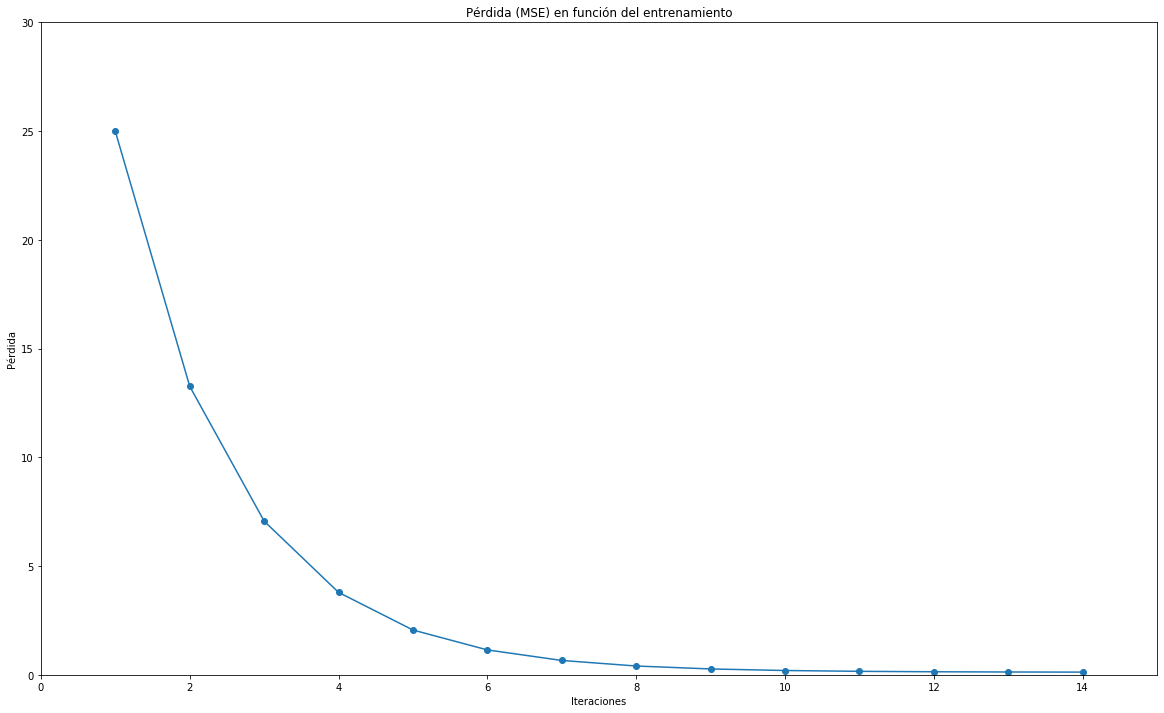

In [202]:
# Predicción y error:
y_hat = m.predict(x)
loss = m.loss(y_hat, y)
# Guardamos los valores de la iteración y de la pérdida en dos listas, para dibujar todos los puntos
iteraciones.append(iteracion)
perdidas.append(loss)
# Dibujamos:
plt.axis([0, 15, 0, 30])
plt.scatter(iteraciones, perdidas) # Prueba plt.plot(iteraciones, perdidas)
plt.plot(iteraciones, perdidas)
plt.title("Pérdida (MSE) en función del entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()
# Un ciclo de entrenamiento:
m.fit(x, y, lr = 0.001)
iteracion = iteracion + 1

### Curva de aprendizaje  (pérdida en función del entrenamiento)

Los anteriores graficos son ilustrativos, pero no se usan. Este, sí.

## Predicción con el modelo ya entrenado (Inferencia)

In [203]:
print(data[:3])

    Año  LluviaInvierno  TemperaturaMediaVerano  LluviaCosecha  Edad  Precio
0  1952             600                 17.1167            160    31  7.4950
1  1953             690                 16.7333             80    30  8.0393
2  1955             502                 17.1500            130    28  7.6858


In [204]:
m.predict(17.1500)

7.249278966823324

### Para terminar con el ejemplo

Sólo nos falta calcular **LOS CINCO PARÁMETROS** que multiplican a las cuatro variables del modelo del profe
* En realidad, tenemos **librerías**

<img src="images/sklearn.png" width="800"/>

https://scikit-learn.org/stable/


## Para terminar con el ejemplo
Sólo nos falta calcular **LOS CUATRO PARÁMETROS** que multiplican a las cuatro variables del modelo del profe

### Buenas noticias
En realidad no necesitamos implementar un algoritmo de aprendizaje máquina. Tenemos **LIBRERIAS** 
* De muy buena calidad
* Con licencia libre

### Por cierto, la regresión lineal sigue siendo una herramienta a tener en cuenta
Está presenta en las principales librerías de aprendizaje máquina

## Implementación del problema con SciKit Learn (sklearn)

In [205]:
from sklearn import linear_model

# Datos de entrenamiento separado en X (variables de entrada) e Y (variable a predecir)
variables = ['LluviaInvierno', 'TemperaturaMediaVerano', 'LluviaCosecha', 'Edad']
X = data[variables].values
Y = data['Precio'].values

# Modelo de regresión lineal:
regressor = linear_model.LinearRegression()

# Entrenamiento:
regressor.fit(X, Y)

# Parámetros del modelo entrenado
print(variables)
print(regressor.coef_)
print(regressor.intercept_)



['LluviaInvierno', 'TemperaturaMediaVerano', 'LluviaCosecha', 'Edad']
[ 0.00116672  0.61639156 -0.0038606   0.02384801]
-3.651570330235236


### Y, por fin, tenemos la fórmula que predice el precio del vino ...

In [206]:
print("precio = {:+.4f} {:+.4f} llu_inv {:+.4f} tem_med_ver {:+.4f} llu_cosecha {:+.4f} edad"
      .format(regressor.intercept_, regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3]))

precio = -3.6516 +0.0012 llu_inv +0.6164 tem_med_ver -0.0039 llu_cosecha +0.0238 edad


### Finalmente, compara nuestro resultado con el de la publicación del profesor Ashenfelter:

<img src="images/coeficientes.articulo.comparados.png" width="1400"/>



## Predicción del precio de un vino 

### Importante: una vez entrenado el modelo, ya no necesitamos los datos de entrenamiento para predecir el precio del vino (Inferencia)

In [207]:
# Los datos de los tres vinos más añejos:
print(data[:3])

    Año  LluviaInvierno  TemperaturaMediaVerano  LluviaCosecha  Edad  Precio
0  1952             600                 17.1167            160    31  7.4950
1  1953             690                 16.7333             80    30  8.0393
2  1955             502                 17.1500            130    28  7.6858


In [208]:
# Predicción del precio del vino más añejo
regressor.predict([[502, 17.1500, 130, 28]])

array([7.67110435])

## Un ejemplo, como introducción: resumen

* A partir de un **conjunto de ejemplos** 
    * Meteorología (X) y precios alcanzados (Y), en este caso
* se calculan los parámetros (**entrenamiento**) de un **modelo matemático**
    * Una ecuación lineal en este caso
* mediante un algoritmo de optimización.
    * **Descenso de gradiente** en este caso.
        * Se define una **función de pérdida** que mide el error del modelo
        * En cada iteración:
            * Se calcula la **predicción** del modelo actual a cada ejemplo ($\hat Y$)
            * Se modifican **ligeramente** los parámetros, según el **gradiente**, para tener un modelo **ligeramente** mejor


### Claves

* Tiene que existir cierta **relación lineal** entre las variables de entrada (X) y el objetivo (Y)
* Se puede intuir que el entrenamiento puede ser **costoso** en cuanto a potencia de cálculo
* Tenemos **hiper-parámetros** que no se entrenan, como por ejemplo el ratio de aprendizaje
* Este y otros **muchos algoritmos** están incluidos en excelentes **librerías '*open source'***
* Aumque este ejemplo de **aprendizaje máquina** sea de los años 90, **sigue siendo válido** hoy en día
    * Ahora tenemos modelos mucho más **complejos**
    * Pero se **entrenan igual**, ajustando poco a poco los parámetros del modelo
        * A partir de un conjunto de **datos de entrenamiento**
